In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
training = pd.read_csv("Knight ML Assignment/Data/train.csv")

In [30]:
training.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [31]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [32]:
training.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


# Data Visualisations

In [33]:
def getQuality(points):
    if(points <= 85):
        return 'bad'
    elif(points<=90 ):
        return 'ok'
    elif(points<=95):
        return 'good'
    elif(points<=100):
        return 'great'
    else:
        return 'If this gets hit, we did something wrong!'

In [34]:
training['quality'] = training['points'].apply(getQuality)

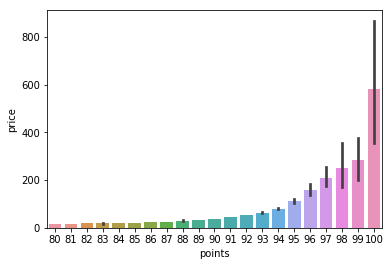

In [9]:
sns.barplot(x = 'points', y = 'price', data = training)

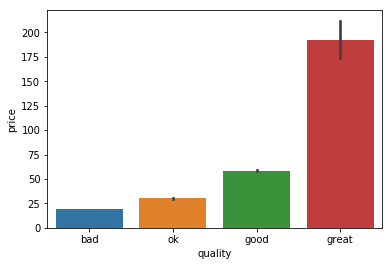

In [23]:
sns.barplot(x = 'quality', y = 'price', data = training)

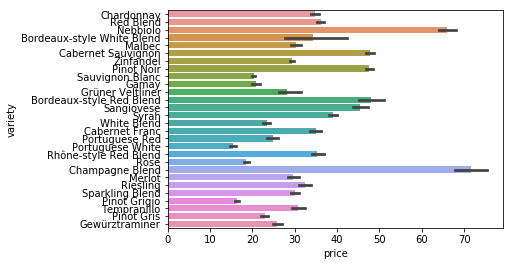

In [66]:
sns_plot=sns.barplot(y = 'variety', x = 'price', data = training)
sns_plot.get_figure().savefig("vareity_barplot.png")

# Word Cloud for the Entire Dataset

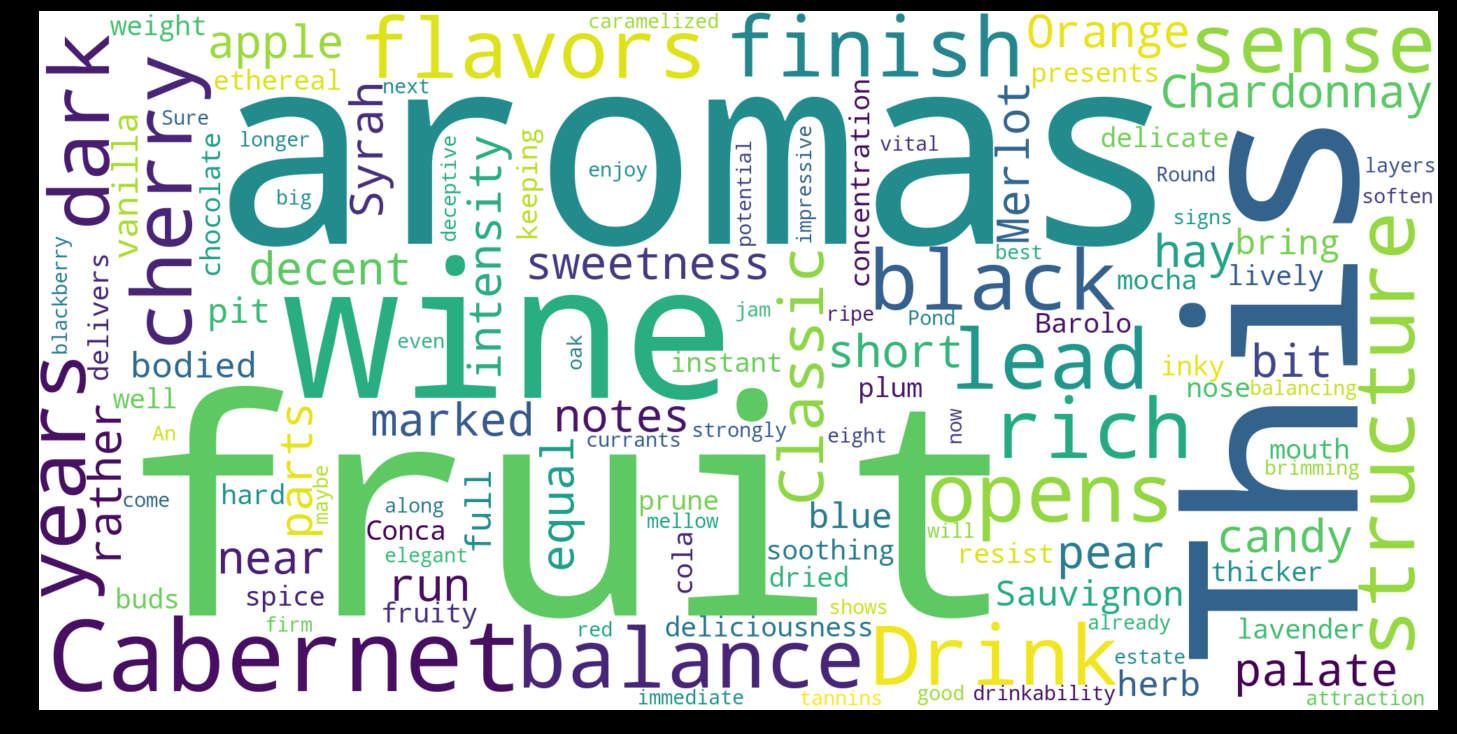

<Figure size 432x288 with 0 Axes>

In [65]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = training.review_description.values
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig("WordCloud.png")

# Machine Learning Part

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from joblib import dump, load

In [36]:
CountVectorizer( 
  input='content', encoding='utf-8', decode_error='strict', 
  strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, 
  stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), 
  analyzer='word', max_df=1.0, min_df=1, max_features=None, 
  vocabulary=None, binary=False, dtype= <class 'numpy.int64'>
)

SyntaxError: invalid syntax (<ipython-input-36-888db54c8cd6>, line 6)

In [37]:
def get_vector_feature_matrix(review_description):
    vectorizer = CountVectorizer(lowercase=True, stop_words="english", max_features=5)
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english")
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english",ngram_range=(1, 2), max_features=20)

    #vectorizer = CountVectorizer(lowercase=True, stop_words="english", tokenizer=stemming_tokenizer) 
    vector = vectorizer.fit_transform(np.array(review_description))
    return vector, vectorizer

In [38]:
vectorizer = CountVectorizer(lowercase=True, stop_words="english", max_features=5)

In [39]:
vector, vectorizer = get_vector_feature_matrix(training['review_description'])

In [40]:
print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [41]:
print(vectorizer.get_feature_names())

['aromas', 'flavors', 'fruit', 'palate', 'wine']


In [42]:
def get_vector_feature_matrix(description):
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english", max_features=5)
    vectorizer = CountVectorizer(lowercase=True, stop_words="english", max_features=1000)
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english",ngram_range=(1, 2), max_features=1000)
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english", tokenizer=stemming_tokenizer) 
    vector = vectorizer.fit_transform(np.array(description))
    return vector, vectorizer

In [43]:
vector, vectorizer = get_vector_feature_matrix(training['review_description'])

In [44]:
features = vector.todense()

In [45]:
label = training['variety'] 

In [46]:
X, y = features, label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Logisitic Regression based MultiLabel Classifier

In [49]:
lr = LogisticRegression(multi_class='ovr',solver='lbfgs')
model = lr.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.6613234938301475


# how to view results on unseen data

In [53]:
test = "Nicely differentiated from the companion Stewart bottling, this Athena is a sharp and spicy affair, with tight, tart cranberry and raspberry fruit. Native yeast fermentation and extended sur-lie aging add some snap to the finish. Try after 2016 for optimum enjoyment."


x = vectorizer.transform(np.array([test]))
proba = model.predict_proba(x)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)
resultdf

,Bordeaux-style Red Blend,Bordeaux-style White Blend,Cabernet Franc,Cabernet Sauvignon,Champagne Blend,Chardonnay,Gamay,Gewürztraminer,Grüner Veltliner,Malbec,...,Rhône-style Red Blend,Riesling,Rosé,Sangiovese,Sauvignon Blanc,Sparkling Blend,Syrah,Tempranillo,White Blend,Zinfandel
0,0.000665,0.00001,0.002888,0.007106,0.083046,0.000391,0.000155,0.000061,0.000236,0.008104,...,0.000875,0.005847,0.000395,0.00208,0.000032,0.002831,0.046943,0.000217,0.000084,0.001814


# Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier().fit(X_train, y_train) 

In [51]:
accuracy = dtree_model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.5454875393176869


# Naive Bayesian Classifier

In [52]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train)
accuracy = dtree_model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.5454875393176869


# Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
accuracy = rfc.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.6619283813210742
